X1	net profit / total assets <br>
X2	total liabilities / total assets <br>
X3	working capital / total assets <br>
X4	current assets / short-term liabilities <br>
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 <br>
X6	retained earnings / total assets <br>
X7	EBIT / total assets <br>
X8	book value of equity / total liabilities <br>
X9	sales / total assets <br>
X10	equity / total assets <br>
X11	(gross profit + extraordinary items + financial expenses) / total assets <br>
X12	gross profit / short-term liabilities <br>
X13	(gross profit + depreciation) / sales <br>
X14	(gross profit + interest) / total assets <br>
X15	(total liabilities * 365) / (gross profit + depreciation) <br>
X16	(gross profit + depreciation) / total liabilities <br>
X17	total assets / total liabilities <br>
X18	gross profit / total assets <br>
X19	gross profit / sales <br>
X20	(inventory * 365) / sales <br>
X21	sales (n) / sales (n-1) <br>
X22	profit on operating activities / total assets <br>
X23	net profit / sales <br>
X24	gross profit (in 3 years) / total assets <br>
X25	(equity - share capital) / total assets <br>
X26	(net profit + depreciation) / total liabilities <br>
X27	profit on operating activities / financial expenses <br>
X28	working capital / fixed assets <br>
X29	logarithm of total assets <br>
X30	(total liabilities - cash) / sales <br>
X31	(gross profit + interest) / sales<br> 
X32	(current liabilities * 365) / cost of products sold <br>
X33	operating expenses / short-term liabilities <br>
X34	operating expenses / total liabilities <br>
X35	profit on sales / total assets <br>
X36	total sales / total assets <br>
X37	(current assets - inventories) / long-term liabilities <br>
X38	constant capital / total assets <br>
X39	profit on sales / sales <br>
X40	(current assets - inventory - receivables) / short-term liabilities <br>
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
X42	profit on operating activities / sales <br>
X43	rotation receivables + inventory turnover in days <br>
X44	(receivables * 365) / sales <br>
X45	net profit / inventory <br>
X46	(current assets - inventory) / short-term liabilities <br>
X47	(inventory * 365) / cost of products sold <br>
X48	EBITDA (profit on operating activities - depreciation) / total assets <br>
X49	EBITDA (profit on operating activities - depreciation) / sales <br>
X50	current assets / total liabilities <br>
X51	short-term liabilities / total assets <br>
X52	(short-term liabilities * 365) / cost of products sold) <br>
X53	equity / fixed assets <br>
X54	constant capital / fixed assets <br>
X55	working capital <br>
X56	(sales - cost of products sold) / sales <br>
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
X58	total costs /total sales <br>
X59	long-term liabilities / equity <br>
X60	sales / inventory <br>
X61	sales / receivables <br>
X62	(short-term liabilities *365) / sales <br>
X63	sales / short-term liabilities <br>
X64	sales / fixed assets<br>

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipline_imb
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.pipeline import FeatureUnion
from fancyimpute import  KNN
from sklearn.preprocessing import StandardScaler
import warnings
import impyute
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
%pylab inline
import warnings
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.metrics import make_scorer,fbeta_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree


pd.options.display.max_rows = 999

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('csv_result-5year.csv',index_col=0)
df.replace('?',np.nan,inplace=True)
df=df.astype('float')

In [3]:
df.shape

(5910, 65)

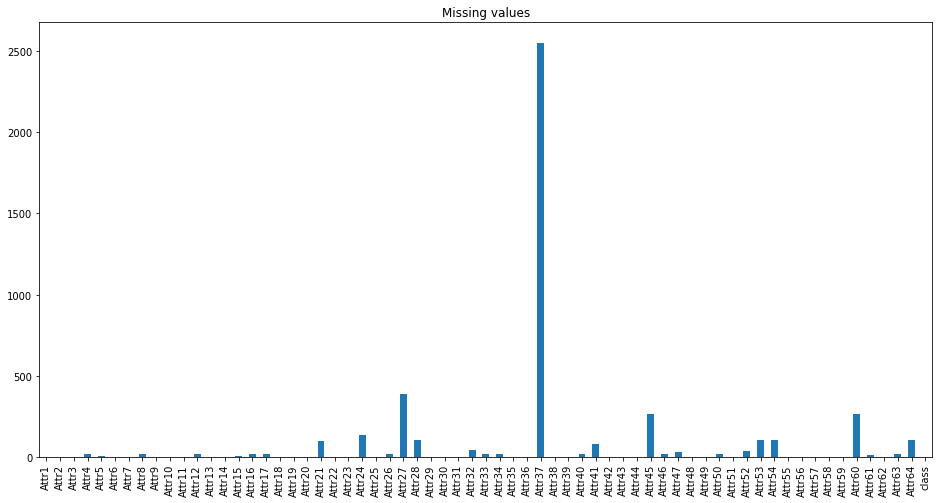

In [4]:
missing=df.isna().sum()
plt.figure(figsize=(16,8))
missing.plot.bar()
plt.title('Missing values')
plt.show()

# Create a machine learning algorithm to predict missing value

# Using KNN to estimate missing value

In [5]:
X=df.drop(['class'],axis=1)
y=df['class']

In [6]:
X_filled_knn = KNN(k=75).fit_transform(X)

Imputing row 1/5910 with 0 missing, elapsed time: 11.991
Imputing row 101/5910 with 1 missing, elapsed time: 12.006
Imputing row 201/5910 with 1 missing, elapsed time: 12.006
Imputing row 301/5910 with 0 missing, elapsed time: 12.006
Imputing row 401/5910 with 1 missing, elapsed time: 12.006
Imputing row 501/5910 with 0 missing, elapsed time: 12.022
Imputing row 601/5910 with 1 missing, elapsed time: 12.022
Imputing row 701/5910 with 1 missing, elapsed time: 12.022
Imputing row 801/5910 with 1 missing, elapsed time: 12.022
Imputing row 901/5910 with 0 missing, elapsed time: 12.038
Imputing row 1001/5910 with 3 missing, elapsed time: 12.038
Imputing row 1101/5910 with 0 missing, elapsed time: 12.038
Imputing row 1201/5910 with 1 missing, elapsed time: 12.038
Imputing row 1301/5910 with 1 missing, elapsed time: 12.038
Imputing row 1401/5910 with 1 missing, elapsed time: 12.053
Imputing row 1501/5910 with 0 missing, elapsed time: 12.053
Imputing row 1601/5910 with 0 missing, elapsed time:

In [7]:
#Normalization
scaler=StandardScaler()
X_filled_knn=scaler.fit_transform(X_filled_knn)

In [8]:
df_KNN=pd.DataFrame(X_filled_knn,columns=X.columns)

# Visualize correlation

In [9]:
corr=df_KNN.corr()

In [10]:
corr_matrix =corr.abs()

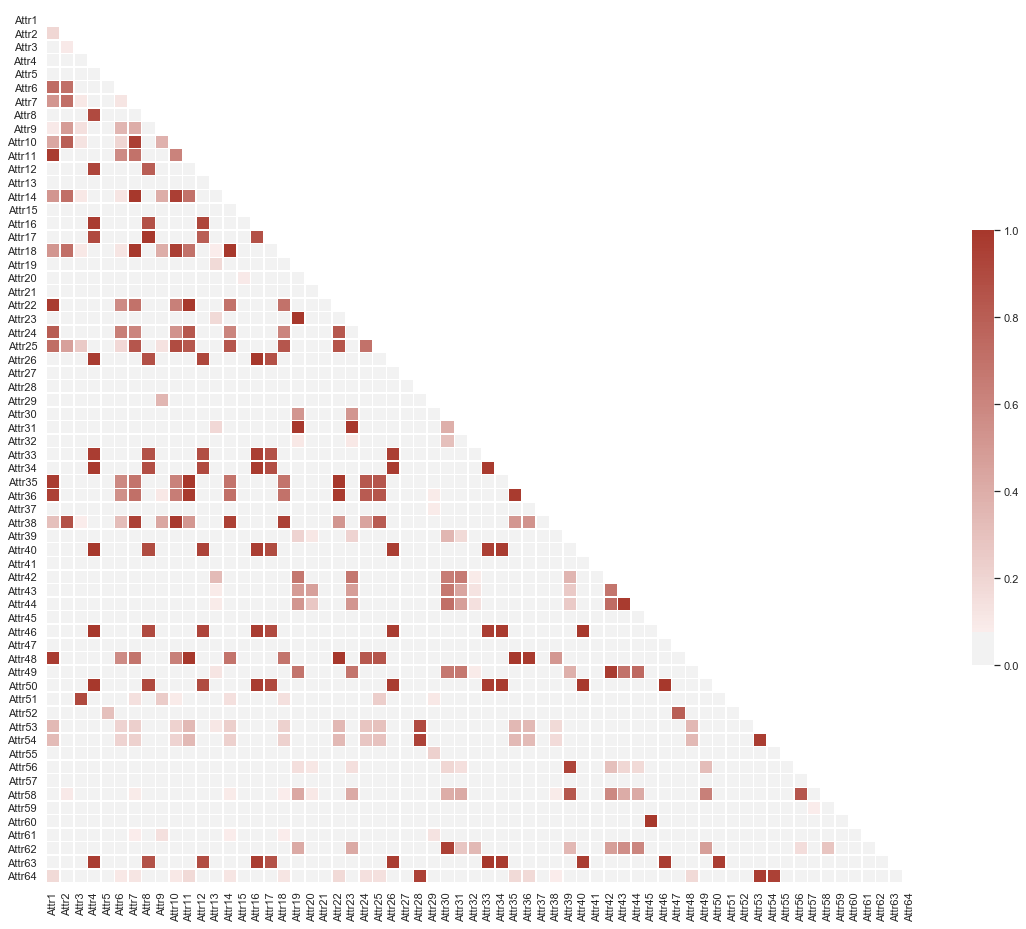

In [11]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(250, 15, as_cmap=True,s=75, l=40,sep=20)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [128]:
#filter out features that are greater than threshold
#We Do NOT drop features
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #upper matrix
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]  #drop correlation >0.8
# df_important_features=df_KNN.drop(df_KNN[to_drop], axis=1)  # drop high correlated features
#df_important_features.columns

# Handling imbalance data

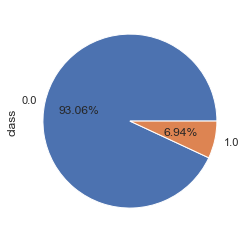

In [14]:
#imbalanced classification
(df['class']).value_counts().plot(kind ='pie', autopct='%1.2f%%')
plt.show();

# Stratified CV and SMOTE and Data Modeling

In [21]:
#make f2 score 
f2=make_scorer(fbeta_score,beta=2)

In [22]:
#Over-Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2019)
pipe1=make_pipline_imb(SMOTE(random_state=2019),LogisticRegression(solver='lbfgs',random_state=2019)) 
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)

In [23]:
#prepare a df to metrics
metrics=pd.DataFrame(index=['accuracy','precision','recall','f1 score','f2 score'],
                     columns=['LogisticReg','DecisionTree','SVM','RandomForest','AdaBoost','XGBoosting'])

In [24]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN
f1 score,NaN,NaN,NaN,NaN,NaN,NaN
f2 score,NaN,NaN,NaN,NaN,NaN,NaN


############################################################
[[878 222]
 [ 23  59]]
accuracy score 0.7927241962774958
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      1100
         1.0       0.21      0.72      0.33        82

    accuracy                           0.79      1182
   macro avg       0.59      0.76      0.60      1182
weighted avg       0.92      0.79      0.84      1182

############################################################
############################################################
############################################################
[[898 202]
 [ 32  50]]
accuracy score 0.8020304568527918
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.88      1100
         1.0       0.20      0.61      0.30        82

    accuracy                           0.80      1182
   macro avg       0.58      0.71      0.59      1182
weighted avg       0.91      0.80      0.84

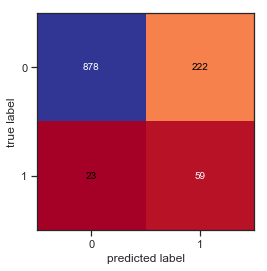

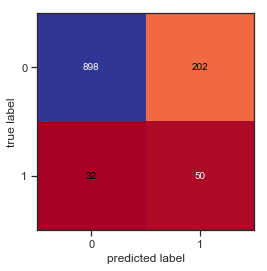

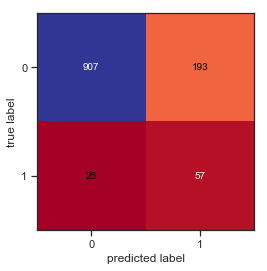

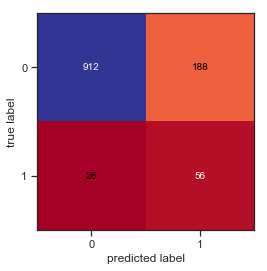

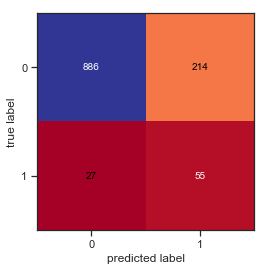

In [85]:
#with SMOTE

#skf.get_n_splits(X,y)
accuracy_smote=[]
precision_smote=[]
recall_smote=[]
f1_smote=[]
f2_smote=[]
auc_smote=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe1.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_smote.append(pipe1.score(X_test,y_test))
    precision_smote.append(precision_score(y_test,prediction))
    recall_smote.append(recall_score(y_test,prediction))
    f1_smote.append(f1_score(y_test,prediction))
    f2_smote.append(f2(pipe1,X_test,y_test))
    #auc_smote.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_smote)))
print("Precision: {}".format(np.mean(precision_smote)))
print("Recall: {}".format(np.mean(recall_smote)))
print("f1: {}".format(np.mean(f1_smote)))
print("f2: {}".format(np.mean(f2_smote)))
metrics.loc['accuracy','LogisticReg']=np.mean(accuracy_smote)
metrics.loc['precision','LogisticReg']=np.mean(precision_smote)
metrics.loc['recall','LogisticReg']=np.mean(recall_smote)
metrics.loc['f1 score','LogisticReg']=np.mean(f1_smote)
metrics.loc['f2 score','LogisticReg']=np.mean(f2_smote)

In [86]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.805076,0.832657,0.813536,0.91286,0.856176,0.878003
precision,0.214069,0.248937,0.219301,0.396813,0.274298,0.318667
recall,0.67561,0.678049,0.658537,0.478049,0.64878,0.656098
f1 score,0.324958,0.361906,0.328885,0.43282,0.385121,0.428042
f2 score,0.471732,0.500575,0.469916,0.45859,0.508953,0.540247


############################################################
[[1095    5]
 [  72   10]]
accuracy score 0.9348561759729273
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1100
         1.0       0.67      0.12      0.21        82

    accuracy                           0.93      1182
   macro avg       0.80      0.56      0.59      1182
weighted avg       0.92      0.93      0.91      1182

############################################################
############################################################
############################################################
[[1094    6]
 [  76    6]]
accuracy score 0.9306260575296108
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1100
         1.0       0.50      0.07      0.13        82

    accuracy                           0.93      1182
   macro avg       0.72      0.53      0.55      1182
weighted avg       0.90      0.93  

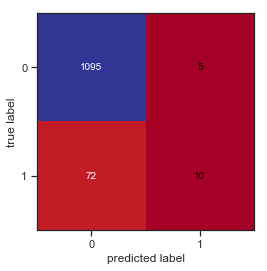

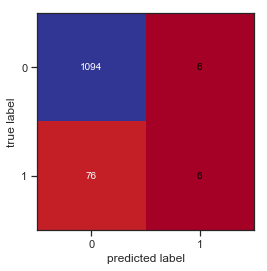

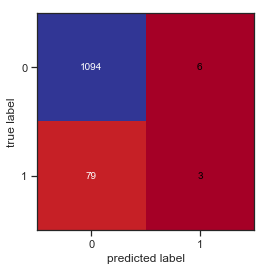

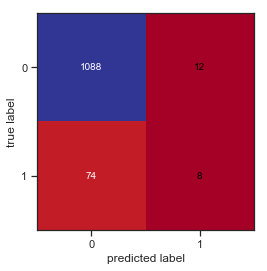

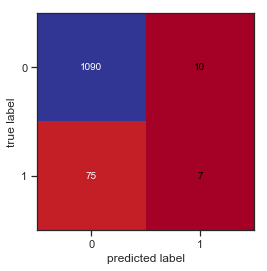

In [87]:
#without SMOTE
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)
accuracy=[]
precision=[]
recall=[]
f1=[]
f2_score=[]
auc=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    logreg=LogisticRegression(random_state=2019,solver='lbfgs')
    logreg.fit(X_train,y_train.ravel())
    prediction=logreg.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy.append(logreg.score(X_test,y_test))
    precision.append(precision_score(y_test,prediction))
    recall.append(recall_score(y_test,prediction))
    f1.append(f1_score(y_test,prediction))
    f2_score.append(f2(logreg,X_test,y_test))
    #auc.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score without SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy)))
print("Precision: {}".format(np.mean(precision)))
print("Recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print("f2: {}".format(np.mean(f2_score)))
print()

Because the data is imbalanced, we observed poor recall score even though the accuracy is high. <br>
As most of classification is 0, we have many False Negative label in confusion matrix, leading to poor recall score. <br>
In contrast, we have better recall score using SMOTE (over-sampling) to re-balance the classification. <br>
We also  would like to emphasis on "Recall" and "Precision" <br> 
Recall is an important score in predicting potential bankcrupcy companies . <br>  This is because people want to know how many bankcrupcy companies the model can identify given that <br>the bankcrupcy companies are known.<br>
Precision: Given that model predict 10 firms, how many are actual bankcrupt companies.<br>
In other words, low Precision score can make investors to miss opportunity investing in good companies <br>
Overall, we want to add more weight to recall than precision. Therefore, we are going to use f2 score in model evaluation


############################################################
[[949 151]
 [ 21  61]]
accuracy score 0.8544839255499154
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1100
         1.0       0.29      0.74      0.41        82

    accuracy                           0.85      1182
   macro avg       0.63      0.80      0.67      1182
weighted avg       0.93      0.85      0.88      1182

############################################################
############################################################
############################################################
[[998 102]
 [ 31  51]]
accuracy score 0.8874788494077834
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1100
         1.0       0.33      0.62      0.43        82

    accuracy                           0.89      1182
   macro avg       0.65      0.76      0.69      1182
weighted avg       0.93      0.89      0.90

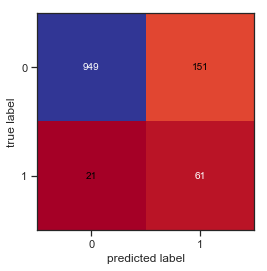

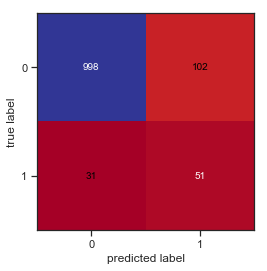

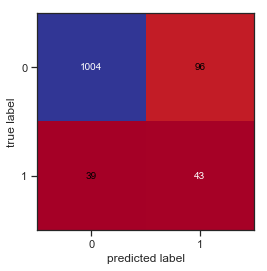

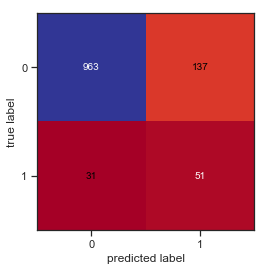

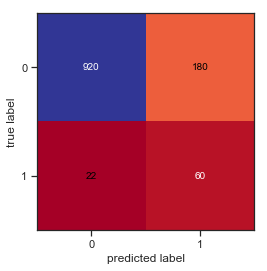

In [88]:

#SMOTE with Decision Tree
pipe2=make_pipline_imb(SMOTE(random_state=2019),DecisionTreeClassifier(random_state=2019,max_depth=7))

accuracy_DT=[]
precision_DT=[]
recall_DT=[]
f1_DT=[]
f2_DT=[]
auc_DT=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    #model=pipe2.fit(X_train,y_train.ravel())
    sm = SMOTE(random_state=2019)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    model=DecisionTreeClassifier(random_state=2019,max_depth=7)
    model.fit(X_res,y_res)
    prediction=model.predict(X_test)
    
    accuracy_DT.append(model.score(X_test,y_test))
    precision_DT.append(precision_score(y_test,prediction))
    recall_DT.append(recall_score(y_test,prediction))
    f1_DT.append(f1_score(y_test,prediction))
    f2_DT.append(f2(model,X_test,y_test))
    auc_DT.append(roc_auc_score(y_test,prediction))
    
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    #try to plot decision tree
#     features = list(df_important_features.columns)
#     tree.export_graphviz(model,out_file='tree.dot')
#     dot_data = StringIO() 
#     tree.export_graphviz(model, out_file=dot_data)
#     export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#     graph = pydot.graph_from_dot_data(dot_data.getvalue())
#     #graph.write_pdf("tree.pdf")
#     Image(graph[0].create_png()) 
    
print()
print("Decision Tree")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_DT)))
print("Precision: {}".format(np.mean(precision_DT)))
print("Recall: {}".format(np.mean(recall_DT)))
print("f1: {}".format(np.mean(f1_DT)))
print("f2: {}".format(np.mean(f2_DT)))
metrics.loc['accuracy','DecisionTree']=np.mean(accuracy_DT)
metrics.loc['precision','DecisionTree']=np.mean(precision_DT)
metrics.loc['recall','DecisionTree']=np.mean(recall_DT)
metrics.loc['f1 score','DecisionTree']=np.mean(f1_DT)
metrics.loc['f2 score','DecisionTree']=np.mean(f2_DT)

In [89]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.805076,0.862944,0.813536,0.91286,0.856176,0.878003
precision,0.214069,0.29034,0.219301,0.396813,0.274298,0.318667
recall,0.67561,0.64878,0.658537,0.478049,0.64878,0.656098
f1 score,0.324958,0.397719,0.328885,0.43282,0.385121,0.428042
f2 score,0.471732,0.51554,0.469916,0.45859,0.508953,0.540247


In [30]:
#SVM
from sklearn.svm import SVC

############################################################
[[881 219]
 [ 24  58]]
accuracy score 0.7944162436548223
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      1100
         1.0       0.21      0.71      0.32        82

    accuracy                           0.79      1182
   macro avg       0.59      0.75      0.60      1182
weighted avg       0.92      0.79      0.84      1182

############################################################
############################################################
############################################################
[[916 184]
 [ 34  48]]
accuracy score 0.8155668358714044
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1100
         1.0       0.21      0.59      0.31        82

    accuracy                           0.82      1182
   macro avg       0.59      0.71      0.60      1182
weighted avg       0.91      0.82      0.85

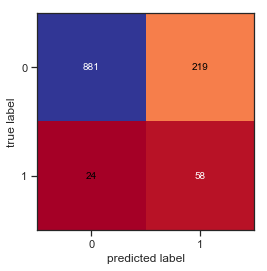

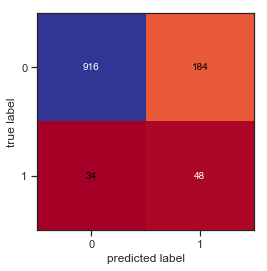

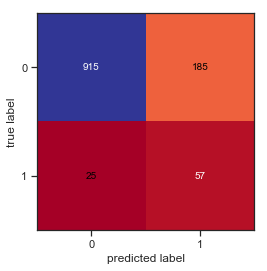

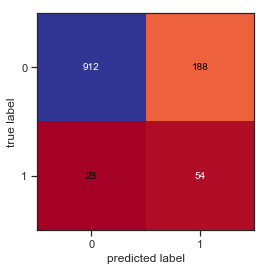

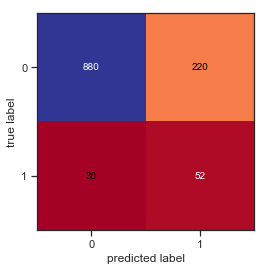

In [90]:
pipe4=make_pipline_imb(SMOTE(),SVC(random_state=2019,C=1))

accuracy_SVC=[]
precision_SVC=[]
recall_SVC=[]
f1_SVC=[]
f2_SVC=[]
auc_SVC=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe4.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_SVC.append(pipe4.score(X_test,y_test))
    precision_SVC.append(precision_score(y_test,prediction))
    recall_SVC.append(recall_score(y_test,prediction))
    f1_SVC.append(f1_score(y_test,prediction))
    f2_SVC.append(f2(pipe4,X_test,y_test))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Support Vector Machine")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_SVC)))
print("Precision: {}".format(np.mean(precision_SVC)))
print("Recall: {}".format(np.mean(recall_SVC)))
print("f1: {}".format(np.mean(f1_SVC)))
print("f2: {}".format(np.mean(f2_SVC)))
metrics.loc['accuracy','SVM']=np.mean(accuracy_SVC)
metrics.loc['precision','SVM']=np.mean(precision_SVC)
metrics.loc['recall','SVM']=np.mean(recall_SVC)
metrics.loc['f1 score','SVM']=np.mean(f1_SVC)
metrics.loc['f2 score','SVM']=np.mean(f2_SVC)

In [91]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.805076,0.862944,0.807614,0.91286,0.856176,0.878003
precision,0.214069,0.29034,0.213227,0.396813,0.274298,0.318667
recall,0.67561,0.64878,0.656098,0.478049,0.64878,0.656098
f1 score,0.324958,0.397719,0.321565,0.43282,0.385121,0.428042
f2 score,0.471732,0.51554,0.462986,0.45859,0.508953,0.540247


# Ensemble 

# RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RF = RandomForestClassifier(random_state=2019)

In [35]:
pipe5=make_pipline_imb(SMOTE(),RF)

############################################################
[[1042   58]
 [  38   44]]
accuracy score 0.9187817258883249
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1100
         1.0       0.43      0.54      0.48        82

    accuracy                           0.92      1182
   macro avg       0.70      0.74      0.72      1182
weighted avg       0.93      0.92      0.92      1182

############################################################
############################################################
############################################################
[[1063   37]
 [  42   40]]
accuracy score 0.9331641285956007
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1100
         1.0       0.52      0.49      0.50        82

    accuracy                           0.93      1182
   macro avg       0.74      0.73      0.73      1182
weighted avg       0.93      0.93  

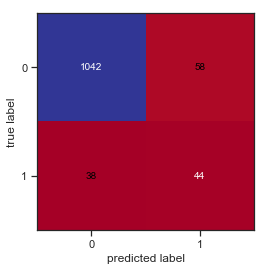

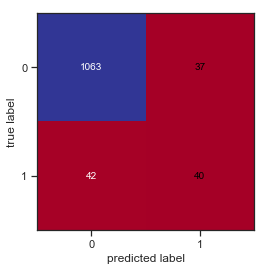

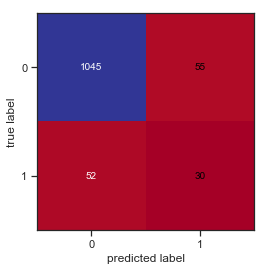

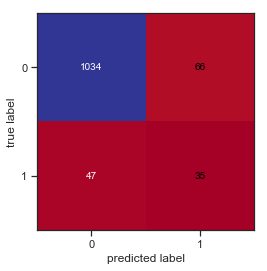

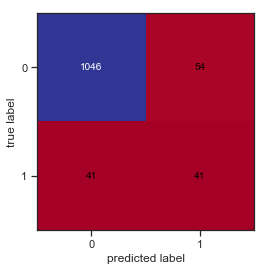

In [93]:
accuracy_RF=[]
precision_RF=[]
recall_RF=[]
f1_RF=[]
f2_RF=[]
auc_RF=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe5.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    accuracy_RF.append(pipe5.score(X_test,y_test))
    precision_RF.append(precision_score(y_test,prediction))
    recall_RF.append(recall_score(y_test,prediction))
    f1_RF.append(f1_score(y_test,prediction))
    f2_RF.append(f2(pipe5,X_test,y_test))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Random Forest")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_RF)))
print("Precision: {}".format(np.mean(precision_RF)))
print("Recall: {}".format(np.mean(recall_RF)))
print("f1: {}".format(np.mean(f1_RF)))
print("f2: {}".format(np.mean(f2_RF)))
metrics.loc['accuracy','RandomForest']=np.mean(accuracy_RF)
metrics.loc['precision','RandomForest']=np.mean(precision_RF)
metrics.loc['recall','RandomForest']=np.mean(recall_RF)
metrics.loc['f1 score','RandomForest']=np.mean(f1_RF)
metrics.loc['f2 score','RandomForest']=np.mean(f2_RF)

In [94]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.805076,0.862944,0.807614,0.91709,0.856176,0.878003
precision,0.214069,0.29034,0.213227,0.416382,0.274298,0.318667
recall,0.67561,0.64878,0.656098,0.463415,0.64878,0.656098
f1 score,0.324958,0.397719,0.321565,0.437295,0.385121,0.428042
f2 score,0.471732,0.51554,0.462986,0.452242,0.508953,0.540247


# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
pipe_AdaBoost=make_pipline_imb(SMOTE(),AdaBoostClassifier(n_estimators=50))

############################################################
[[963 137]
 [ 28  54]]
accuracy score 0.8604060913705583
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      1100
         1.0       0.28      0.66      0.40        82

    accuracy                           0.86      1182
   macro avg       0.63      0.77      0.66      1182
weighted avg       0.92      0.86      0.88      1182

############################################################
############################################################
############################################################
[[967 133]
 [ 28  54]]
accuracy score 0.8637901861252115
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      1100
         1.0       0.29      0.66      0.40        82

    accuracy                           0.86      1182
   macro avg       0.63      0.77      0.66      1182
weighted avg       0.92      0.86      0.89

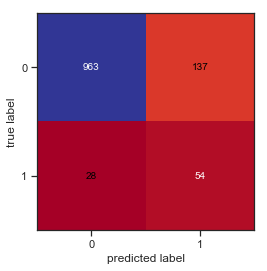

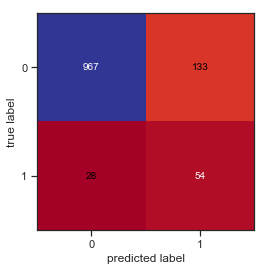

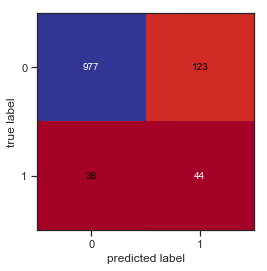

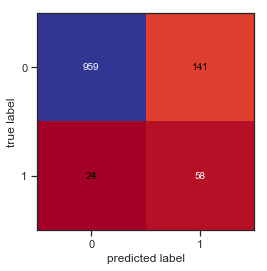

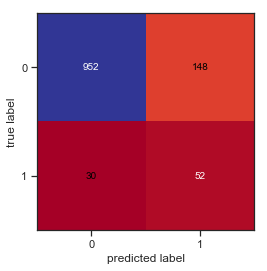

In [95]:
accuracy_AdaBoost=[]
precision_AdaBoost=[]
recall_AdaBoost=[]
f1_AdaBoost=[]
f2_AdaBoost=[]
auc_AdaBoost=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe_AdaBoost.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_AdaBoost.append(pipe_AdaBoost.score(X_test,y_test))
    precision_AdaBoost.append(precision_score(y_test,prediction))
    recall_AdaBoost.append(recall_score(y_test,prediction))
    f1_AdaBoost.append(f1_score(y_test,prediction))
    f2_AdaBoost.append(f2(pipe_AdaBoost,X_test,y_test))
    #auc_AdaBoost.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Adaptive Boosting")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_AdaBoost)))
print("Precision: {}".format(np.mean(precision_AdaBoost)))
print("Recall: {}".format(np.mean(recall_AdaBoost)))
print("f1: {}".format(np.mean(f1_AdaBoost)))
print("f2: {}".format(np.mean(f2_AdaBoost)))
metrics.loc['accuracy','AdaBoost']=np.mean(accuracy_AdaBoost)
metrics.loc['precision','AdaBoost']=np.mean(precision_AdaBoost)
metrics.loc['recall','AdaBoost']=np.mean(recall_AdaBoost)
metrics.loc['f1 score','AdaBoost']=np.mean(f1_AdaBoost)
metrics.loc['f2 score','AdaBoost']=np.mean(f2_AdaBoost)

# XGBoost (Extreme Gradient Boosting)

In [42]:
from xgboost import XGBClassifier


In [43]:
xgb = XGBClassifier(max_depth=3)

In [44]:
pipe_xgb=make_pipline_imb(SMOTE(),xgb)

############################################################
[[990 110]
 [ 26  56]]
accuracy score 0.8849407783417935
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      1100
         1.0       0.34      0.68      0.45        82

    accuracy                           0.88      1182
   macro avg       0.66      0.79      0.69      1182
weighted avg       0.93      0.88      0.90      1182

############################################################
############################################################
############################################################
[[1023   77]
 [  24   58]]
accuracy score 0.9145516074450084
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      1100
         1.0       0.43      0.71      0.53        82

    accuracy                           0.91      1182
   macro avg       0.70      0.82      0.74      1182
weighted avg       0.94      0.91      

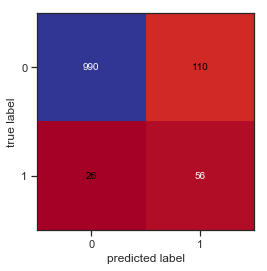

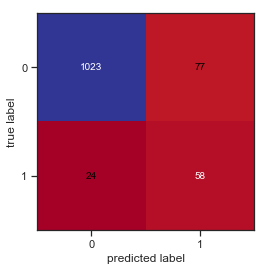

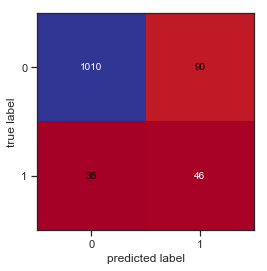

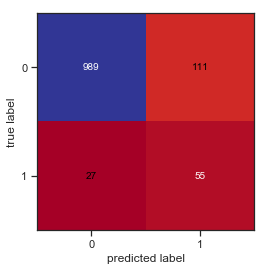

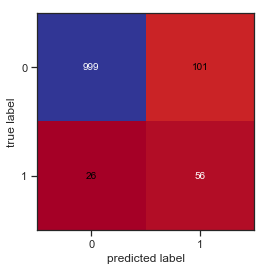

In [96]:
accuracy_xgb=[]
precision_xgb=[]
recall_xgb=[]
f1_xgb=[]
f2_xgb=[]
auc_xgb=[]
for train_index,test_index in skf.split(X_filled_knn,y):
    X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    sm = SMOTE(random_state=2019)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    model=xgb
    model.fit(X_res,y_res)
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    #fig, ax = plt.subplots(figsize=(30, 30))
    #plot_tree(model, num_trees=3, ax=ax)
    #plt.show()
    
    accuracy_xgb.append(pipe_xgb.score(X_test,y_test))
    precision_xgb.append(precision_score(y_test,prediction))
    recall_xgb.append(recall_score(y_test,prediction))
    f1_xgb.append(f1_score(y_test,prediction))
    f2_xgb.append(f2(pipe_xgb,X_test,y_test))
    #auc_xgb.append(roc_auc_score(y_test,prediction))
    
    
print()
print("XGBoosting")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_xgb)))
print("Precision: {}".format(np.mean(precision_xgb)))
print("Recall: {}".format(np.mean(recall_xgb)))
print("f1: {}".format(np.mean(f1_xgb)))
print("f2: {}".format(np.mean(f2_xgb)))
metrics.loc['accuracy','XGBoosting']=np.mean(accuracy_xgb)
metrics.loc['precision','XGBoosting']=np.mean(precision_xgb)
metrics.loc['recall','XGBoosting']=np.mean(recall_xgb)
metrics.loc['f1 score','XGBoosting']=np.mean(f1_xgb)
metrics.loc['f2 score','XGBoosting']=np.mean(f2_xgb)

In [97]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.805076,0.862944,0.807614,0.91709,0.85956,0.893739
precision,0.214069,0.29034,0.213227,0.416382,0.277285,0.358646
recall,0.67561,0.64878,0.656098,0.463415,0.639024,0.660976
f1 score,0.324958,0.397719,0.321565,0.437295,0.386422,0.464072
f2 score,0.471732,0.51554,0.462986,0.452242,0.506331,0.564568


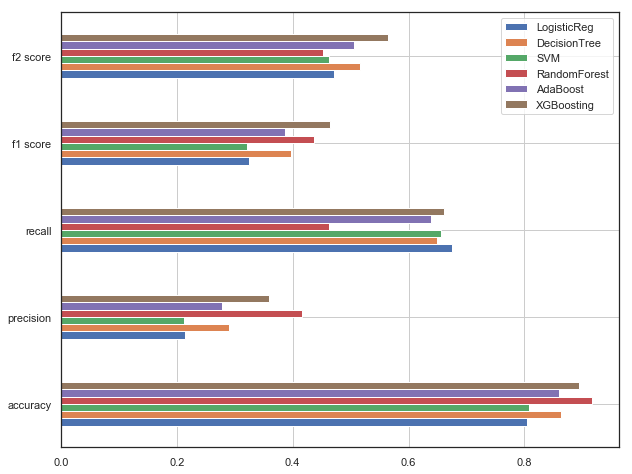

In [98]:
fig,ax=plt.subplots(figsize=(10,8))
metrics.plot(kind='barh',ax=ax)
ax.grid()

# Tuning using GridSearchCV

In [105]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [106]:

y=df['class']

# Logistic Regression Tuning

In [107]:
LogReg_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', LogisticRegression(random_state=2019))
                 ])


LogReg_param_grid = [{'classifier__C':[ 0.001, 0.01, 0.1,1,10],
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}]}]

LogReg_grid = GridSearchCV(estimator=LogReg_model,param_grid=LogReg_param_grid,cv=5,scoring=f2)


In [108]:
LogReg_GSC=LogReg_grid.fit(X=X_filled_knn,y=y)

In [109]:
LogReg_GSC.best_score_

0.33640980165000783

In [110]:
LogReg_GSC.best_params_

{'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}}

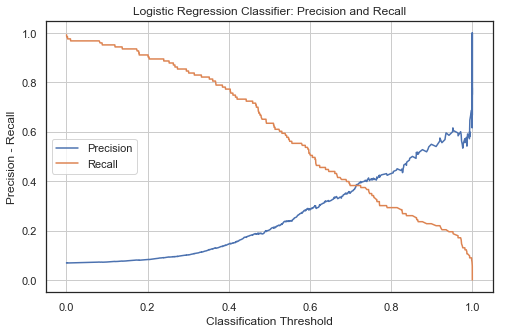

In [119]:
#try to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(X_filled_knn, y,stratify=y, test_size=0.3,shuffle=True,random_state=123)

LogReg_model.fit(X_train,y_train)
LogReg_prediction=LogReg_model.predict(X_test)
precision_LR, recall_LR,thresholds_LR=precision_recall_curve(y_test,probas_pred=LogReg_model.predict_proba(X_test)[:,1],pos_label=1)

fig,ax=plt.subplots(figsize=(8,5))
ax.plot(thresholds_LR,precision_LR[1:],label='Precision')
ax.plot(thresholds_LR,recall_LR[1:],label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision - Recall')
ax.set_title('Logistic Regression Classifier: Precision and Recall')
ax.legend()
ax.grid()

Above: Logistic Regression Precison-Recall Trade-Off by adjusting Threshold (Default threshold is 0.5)

# Decision Tree Tuning

In [120]:
DT_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', DecisionTreeClassifier(random_state=2019))
                 ])


DT_param_grid = [{'classifier__max_depth':np.arange(5,25,1),
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}]}]

DT_grid = GridSearchCV(estimator=DT_model,param_grid=DT_param_grid,cv=5,scoring=f2)
DT_GSC=DT_grid.fit(X=X_filled_knn,y=y)

In [121]:
DT_GSC.best_score_

0.4861598336673742

In [122]:
DT_GSC.best_params_

{'classifier__class_weight': {0: 0.8, 1: 0.2}, 'classifier__max_depth': 14}

# SVM Tuning

In [123]:
SVM_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',SVC(random_state=2019,probability=True))               
                   ])

SVM_param_grid=[{'classifier__C':[ 0.01, 0.1,1,10],
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80}]}]

SVM_grid=GridSearchCV(estimator=SVM_model,param_grid=SVM_param_grid,cv=5,scoring=f2)
SVM_GSC=SVM_grid.fit(X_filled_knn,y)

In [124]:
SVM_GSC.best_score_

0.3104131911077136

In [125]:
SVM_GSC.best_params_

{'classifier__C': 10, 'classifier__class_weight': {0: 0.2, 1: 0.8}}

In [126]:
SVM_GSC.best_index_

11

# Random Forest Tuning

In [129]:
RF_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',RandomForestClassifier(random_state=2019))               
                   ])
RF_param_grid=[{'classifier__n_estimators':[10,20,30,40,50],
               'classifier__class_weight':[{0:0.3, 1:0.7}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}],
               'classifier__max_depth':np.arange(5,15,1)
               }]
RF_grid=GridSearchCV(estimator=RF_model,param_grid=RF_param_grid,cv=5,scoring=f2)
RF_GSC=RF_grid.fit(X_filled_knn,y)

In [130]:
RF_GSC.best_score_

0.5343667472740424

In [131]:
RF_GSC.best_params_

{'classifier__class_weight': {0: 0.8, 1: 0.2},
 'classifier__max_depth': 14,
 'classifier__n_estimators': 50}

In [132]:
RF_GSC.best_index_

99

# AdaBoost Tuning

In [133]:
AdaBoost_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',AdaBoostClassifier(random_state=2019))               
                   ])
AdaBoost_param_grid=[{'classifier__n_estimators':[10,20,30,40,50] }]
AdaBoost_grid=GridSearchCV(estimator=AdaBoost_model,param_grid=AdaBoost_param_grid,cv=5,scoring=f2)
AdaBoost_GSC=AdaBoost_grid.fit(X_filled_knn,y)

In [134]:
AdaBoost_GSC.best_score_

0.4989099852970176

In [135]:
AdaBoost_GSC.best_params_

{'classifier__n_estimators': 40}

# XGBoosting Tuning

In [ ]:
xgb_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',XGBClassifier(random_state=2019))
                   ])
xgb_param_grid=[{'classifier__max_depth':np.arange(5,15,1),
               'classifier__n_estimators':[10,20,30,40,50,70,100], 
               }]
xgb_grid=GridSearchCV(estimator=xgb_model,param_grid=xgb_param_grid,cv=5,scoring=f2)

xgb_GSC=xgb_grid.fit(X_filled_knn,y.as_matrix())

In [ ]:
xgb_GSC.best_score_

In [ ]:
xgb_GSC.best_params_

# Combine all models together

In [48]:
#Adjust parameters after tuning
models=[LogisticRegression(C=10,class_weight={0: 0.2, 1: 0.8}),
        DecisionTreeClassifier(max_depth=14,class_weight={0: 0.8, 1: 0.2}),
        SVC(C=10,class_weight={0: 0.2, 1: 0.8}),
        RandomForestClassifier(class_weight={0: 0.8, 1: 0.2},max_depth=14,n_estimators=50),
        AdaBoostClassifier(n_estimators=40),
        XGBClassifier(max_depth=7,n_estimators=40)]
model_name=['Logistic Regression','Decision Tree','Support Vector Machine','Random Forest','Adaptive Boost','XGB']
new_metrics=pd.DataFrame(index=['accuracy','precision','recall','f1 score','f2 score'],
                     columns=['Logistic Regression','Decision Tree','Support Vector Machine','Random Forest','Adaptive Boost','XGB'])

Logistic Regression  accuracy :  0.316243654822335
Logistic Regression  precision :  0.0865681565380899
Logistic Regression  recall :  0.9268292682926829
Logistic Regression  F1 :  0.15832936948472215
Logistic Regression  F2 :  0.31502642583334745
############################################################
Decision Tree  accuracy :  0.7732656514382402
Decision Tree  precision :  0.19626741635217052
Decision Tree  recall :  0.7292682926829268
Decision Tree  F1 :  0.30890970267708917
Decision Tree  F2 :  0.4717323658545177
############################################################
Support Vector Machine  accuracy :  0.3175972927241963
Support Vector Machine  precision :  0.08446467254641123
Support Vector Machine  recall :  0.8975609756097562
Support Vector Machine  F1 :  0.15437883853493345
Support Vector Machine  F2 :  0.30672227060077567
############################################################
Random Forest  accuracy :  0.860067681895093
Random Forest  precision :  0.2848419793

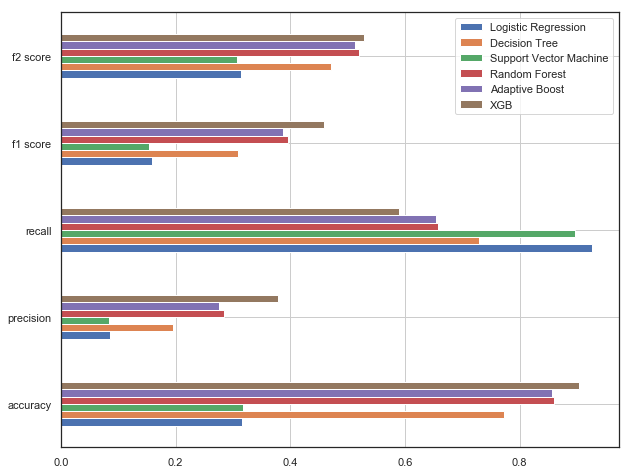

In [49]:
for name,model in zip(model_name,models):
    pipe=make_pipline_imb(SMOTE(random_state=2019),model)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    f2_Score=[]
    auc=[]
    for train_index,test_index in skf.split(X_filled_knn,y):
        X_train,X_test=X_filled_knn[train_index],X_filled_knn[test_index]
        y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
        y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
        
        predictor=pipe.fit(X_train,y_train.ravel())
        prediction=predictor.predict(X_test)
        
        accuracy.append(pipe.score(X_test,y_test))
        precision.append(precision_score(y_test,prediction))
        recall.append(recall_score(y_test,prediction))
        f1.append(f1_score(y_test,prediction))
        f2_Score.append(f2(pipe,X_test,y_test))
        
    print(name,' accuracy : ',np.mean(accuracy))
    print(name,' precision : ',np.mean(precision))
    print(name,' recall : ', np.mean(recall))
    print(name,' F1 : ',np.mean(f1))
    print(name,' F2 : ',np.mean(f2_Score))
    print('#'*60)
    
    new_metrics.loc['accuracy',name]=np.mean(accuracy)
    new_metrics.loc['precision',name]=np.mean(precision)
    new_metrics.loc['recall',name]=np.mean(recall)
    new_metrics.loc['f1 score',name]=np.mean(f1)
    new_metrics.loc['f2 score',name]=np.mean(f2_Score)
fig,ax=plt.subplots(figsize=(10,8))
new_metrics.plot(kind='barh',ax=ax)
ax.grid()

# ROC AUC

In [56]:
#ROC CUrve to compare model
from sklearn.metrics import roc_curve,roc_auc_score

In [54]:
LogReg_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', LogisticRegression(C=10,class_weight={0: 0.2, 1: 0.8},random_state=2019))
                 ])
DT_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', DecisionTreeClassifier(max_depth=10,class_weight={0: 0.2, 1: 0.8},random_state=2019))
                 ])

SVM_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',SVC(C=10,class_weight={0: 0.2, 1: 0.8},random_state=2019,probability=True))               
                   ])
RF_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},max_depth=12,n_estimators=50,random_state=2019))               
                   ])
AdaBoost_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',AdaBoostClassifier(n_estimators=50,random_state=2019))               
                   ])
xgb_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',XGBClassifier(max_depth=7,n_estimators=40,random_state=2019))
                   ])

AUC score for Logistics Regression: 0.8205 
AUC score for Decision Tree: 0.7922
AUC score for SVM: 0.7897
AUC score for Random Forest: 0.8791
AUC score for Adaptive Boost: 0.8353
AUC score for XGBoosting: 0.8896


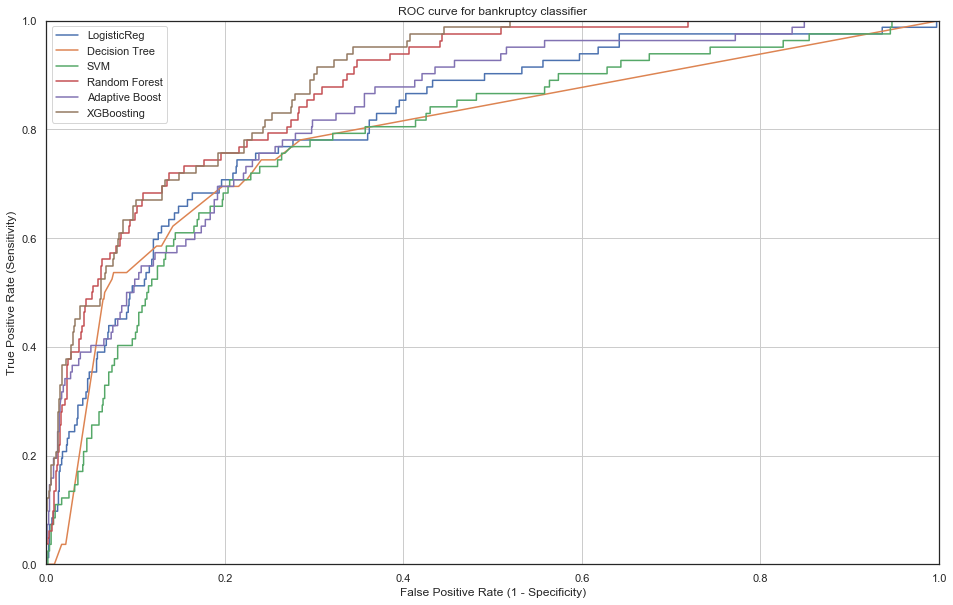

In [75]:
LogReg_model.fit(X_train,y_train)
y_pred_prob_LR=LogReg_model.predict_proba(X_test)[:,1]

DT_model.fit(X_train,y_train)
y_pred_prob_DT=DT_model.predict_proba(X_test)[:,1]


SVM_model.fit(X_train,y_train)
y_pred_prob_SVM=SVM_model.predict_proba(X_test)[:,1]

RF_model.fit(X_train,y_train)
y_pred_prob_RF=RF_model.predict_proba(X_test)[:,1]

AdaBoost_model.fit(X_train,y_train)
y_pred_prob_AdaBoost=AdaBoost_model.predict_proba(X_test)[:,1]

xgb_model.fit(X_train,y_train)
y_pred_prob_xgb=xgb_model.predict_proba(X_test)[:,1]

fpr_LR, tpr_LR,_ = roc_curve(y_test, y_pred_prob_LR)
fpr_DT, tpr_DT,_ = roc_curve(y_test, y_pred_prob_DT)
fpr_SVM, tpr_SVM,_ = roc_curve(y_test, y_pred_prob_SVM)
fpr_RF, tpr_RF,_ = roc_curve(y_test, y_pred_prob_RF)
fpr_AdaBoost, tpr_AdaBoost,_ = roc_curve(y_test, y_pred_prob_AdaBoost)
fpr_xgb, tpr_xgb,_ = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(16,10))
plt.plot(fpr_LR, tpr_LR,label='LogisticReg')
plt.plot(fpr_DT, tpr_DT,label='Decision Tree')
plt.plot(fpr_SVM, tpr_SVM,label='SVM')
plt.plot(fpr_RF, tpr_RF,label='Random Forest')
plt.plot(fpr_AdaBoost, tpr_AdaBoost,label='Adaptive Boost')
plt.plot(fpr_xgb, tpr_xgb,label='XGBoosting')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for bankruptcy classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

print('AUC score for Logistics Regression: %.4f '%(roc_auc_score(y_test,y_pred_prob_LR)))
print('AUC score for Decision Tree: %.4f'%(roc_auc_score(y_test,y_pred_prob_DT)))
print('AUC score for SVM: %.4f'%(roc_auc_score(y_test,y_pred_prob_SVM)))
print('AUC score for Random Forest: %.4f'%(roc_auc_score(y_test,y_pred_prob_RF)))
print('AUC score for Adaptive Boost: %.4f'%(roc_auc_score(y_test,y_pred_prob_AdaBoost)))
print('AUC score for XGBoosting: %.4f'%(roc_auc_score(y_test,y_pred_prob_xgb)))

In [77]:
from xgboost import plot_tree,plot_importance,to_graphviz

In [ ]:
xgb.booster()